# Buffalo Climate Study

## Introduction

The following is a first look at climate data for Buffalo, NY. The purpose of this study is to gain a first impression of overall trends in yearly average summer and winter temperatures and yearly snowfall. 

All datasets are from NOAA, the National Oceanic and Atmospheric Administration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Yearly Snowfall

To begin my study of climate change in Buffalo, I obtained yearly snowfall totals from NOAA.

In [2]:
bflo_snowfall = pd.read_csv('Buffalo_Snowfall_Data.csv')
print(bflo_snowfall.head())


    SEASON  JUL  AUG SEP  OCT   NOV   DEC   JAN   FEB   MAR  APR MAY  JUN  \
0  1940-41    0    0   0    T  17.5  12.1  17.3  23.1   9.3    T   0  0.0   
1  1941-42    0    0   0    T     5   7.8  31.0  28.0  13.7  4.1   0  0.0   
2  1942-43    0    0   0    T   8.7  26.7  16.9  17.7  10.4  5.1   T  0.0   
3  1943-44    0    0   0  1.5  13.6   1.7   3.4  24.6  10.5  2.7   0  0.0   
4  1944-45    0    0   0    0   3.9  35.1  50.6  23.3   5.8    T   2  0.0   

   ANNUAL  YEAR  
0    79.3   NaN  
1    89.6   NaN  
2    85.5   NaN  
3    58.0   NaN  
4   120.7   NaN  


In [5]:
bflo_snowfall.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 15 columns):
SEASON    78 non-null object
JUL       78 non-null int64
AUG       78 non-null int64
SEP       78 non-null object
OCT       78 non-null object
NOV       78 non-null object
DEC       78 non-null float64
JAN       78 non-null float64
FEB       78 non-null float64
MAR       77 non-null object
APR       77 non-null object
MAY       77 non-null object
JUN       77 non-null float64
ANNUAL    78 non-null float64
YEAR      0 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 9.2+ KB


**Adding a *year* column to the DataFrame:** <br>

I would like to take a look at how annual snowfall totals have changed over time. This data is organized by seasons. Instead of using seasons, I will create a new column *year* that will indicate the starting year of that winter in which the data was collected. 

The *SEASON* column stores the years that the data for that particular winter was collected as a string. I will also need to convert that to an integer when creating my *year* column. To do so, first I will create a function *Get_Year* that will read in the first four characters of the *SEASONS* column and convert this result to an integer.

In [6]:
def Get_Year(season):
    year_str = season[:4]
    return(int(year_str))

In [7]:
Get_Year(bflo_snowfall['SEASON'][1])

1941

The function Get_Year is working properly. I will apply it to the *SEASONS* column of the bflo_snowfall dataframe and put these results into the new column *year*

In [8]:
bflo_snowfall['year'] = bflo_snowfall['SEASON'].apply(Get_Year)

In [9]:
print(bflo_snowfall.head())

    SEASON  JUL  AUG SEP  OCT   NOV   DEC   JAN   FEB   MAR  APR MAY  JUN  \
0  1940-41    0    0   0    T  17.5  12.1  17.3  23.1   9.3    T   0  0.0   
1  1941-42    0    0   0    T     5   7.8  31.0  28.0  13.7  4.1   0  0.0   
2  1942-43    0    0   0    T   8.7  26.7  16.9  17.7  10.4  5.1   T  0.0   
3  1943-44    0    0   0  1.5  13.6   1.7   3.4  24.6  10.5  2.7   0  0.0   
4  1944-45    0    0   0    0   3.9  35.1  50.6  23.3   5.8    T   2  0.0   

   ANNUAL  YEAR  year  
0    79.3   NaN  1940  
1    89.6   NaN  1941  
2    85.5   NaN  1942  
3    58.0   NaN  1943  
4   120.7   NaN  1944  


In [10]:
print(type(bflo_snowfall['year'][0]))

<class 'numpy.int64'>


** Further Data Cleaning **

Next I will delete any columns corresponding to months where no snowfall took place. 
First I will identify these columns.

In [11]:
print(bflo_snowfall.columns)

Index(['SEASON', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR',
       'APR', 'MAY', 'JUN', 'ANNUAL', 'YEAR', 'year'],
      dtype='object')


In [12]:
zero_snowfall_cols = []

for column in bflo_snowfall.columns:
    if (bflo_snowfall[column] == 0).all():
        zero_snowfall_cols.append(column)

print(zero_snowfall_cols)
    

['JUL', 'AUG']


The above result indicates that only the months of July and August saw no snowfall in Buffalo, NY. I found this intriguing, as I was unaware that it had ever snowed in the months of June or September. 
I would like to take a look at these instances in June and September that saw snowfall and make sure this is true.

I did look at a summary of the data when I first loaded in the data set. Most columns contain 78 non null entires, but June was one of the columns that did contain null entries. This is probably why June was not on the list of months that received no snowfall. I would like to explore all of the missing data to determine how to incorporate it.

I can verify this below:

In [13]:
pd.isnull(bflo_snowfall['JUN']).any()

True

As expected, The *June* column contains some missing data.

In [14]:
bflo_snowfall['JUN'].sum()

0.0

Summing the total snowfall during the months of *June* I get zero. This tells me its safe to fill in the missing values for *June* with zero.

In [15]:
bflo_snowfall['JUN'].fillna(0, inplace=True)
bflo_snowfall['JUN'].isnull().any()

False

Now that the missing values for June snowfall have been filled in, let's take a look at September snowfall data.

In [16]:
pd.isnull(bflo_snowfall['SEP']).any()

False

I found it interesting that September had no null values. Why then was it not included in the months where no snowfall was recorded? 

In [17]:
bflo_snowfall['SEP'].value_counts()

0    76
T     2
Name: SEP, dtype: int64

This solves the mystery as to why September is not counted among the months receiving no snowfall, there are two years where the month of September received a trace amount of snowfall. 
Therefore, it will be safe for me to not only exclude the months of July and August from the snowfall study, but also the months of September and June. 

Therefore, I will make a subset of the *bflo_snowfall* dataframe and exclude the *SEASONS* column as well as the months that do not see measureable amounts of snowfall.

In [18]:
bflo_snowfall_subset = bflo_snowfall[['year','OCT','NOV','DEC','JAN','FEB','MAR','APR','MAY','ANNUAL']]
print(bflo_snowfall_subset.head())

   year  OCT   NOV   DEC   JAN   FEB   MAR  APR MAY  ANNUAL
0  1940    T  17.5  12.1  17.3  23.1   9.3    T   0    79.3
1  1941    T     5   7.8  31.0  28.0  13.7  4.1   0    89.6
2  1942    T   8.7  26.7  16.9  17.7  10.4  5.1   T    85.5
3  1943  1.5  13.6   1.7   3.4  24.6  10.5  2.7   0    58.0
4  1944    0   3.9  35.1  50.6  23.3   5.8    T   2   120.7


In [19]:
bflo_snowfall_subset.info(verbose=True)
print(bflo_snowfall_subset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
year      78 non-null int64
OCT       78 non-null object
NOV       78 non-null object
DEC       78 non-null float64
JAN       78 non-null float64
FEB       78 non-null float64
MAR       77 non-null object
APR       77 non-null object
MAY       77 non-null object
ANNUAL    78 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 6.2+ KB
Index(['year', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY',
       'ANNUAL'],
      dtype='object')


From the above information, I see there is still some work to do.

1.) March, April, and May still have one missing value each. 
<br>
    
2.) October, November, March, April, and May columns are type "object" indicating that at least one value in these columns is a string. I suspect that this is from the value *T* that is recorded when a trace amount of snowfall was recorded. 
<br>

First I will fix issue number 2. I am going to replace all values of *T* in the DataFrame with a value of zero.

In [20]:
print(bflo_snowfall_subset['OCT'][:5])
print(type(bflo_snowfall_subset['OCT'][0]))

0      T
1      T
2      T
3    1.5
4      0
Name: OCT, dtype: object
<class 'str'>


In [21]:
pd.options.mode.chained_assignment = None 

In [22]:
bflo_snowfall_subset['OCT'] = bflo_snowfall_subset['OCT'].apply(lambda x: x.replace('T','0'))

In [23]:
def remove_T(column):
    bflo_snowfall_subset[column] = bflo_snowfall_subset[column].apply(str)
    bflo_snowfall_subset[column] = bflo_snowfall_subset[column].apply(lambda x: x.replace('T','0'))


In [24]:
columns_T = ['DEC','NOV','JAN','FEB','MAR','APR','MAY']

for column in columns_T:
    remove_T(column)

In [25]:
print(bflo_snowfall_subset.head(10))

   year  OCT   NOV   DEC   JAN   FEB   MAR  APR  MAY  ANNUAL
0  1940    0  17.5  12.1  17.3  23.1   9.3    0    0    79.3
1  1941    0     5   7.8  31.0  28.0  13.7  4.1    0    89.6
2  1942    0   8.7  26.7  16.9  17.7  10.4  5.1    0    85.5
3  1943  1.5  13.6   1.7   3.4  24.6  10.5  2.7    0    58.0
4  1944    0   3.9  35.1  50.6  23.3   5.8    0    2   120.7
5  1945    0  25.2  51.1  10.7  23.5     0    0    0   110.5
6  1946    0     0  11.9  13.0  22.2  13.5    4  0.8    65.4
7  1947    0   9.9   4.3  16.7   7.0   4.2    0    0    42.1
8  1948    0   1.3   7.0  11.8   5.2  14.3  0.5    0    40.1
9  1949    0  28.6   9.5  14.8  19.3  13.7  2.8    0    88.7


Now that all of the *T's* are removed I have a couple more things to do:

1. I want to ensure that the data types of each column of my subsetted dataframe are uniform. That is, all columns should be of numeric type.

2. I want to make all of my column names lowercase.

In [28]:
for column in ['OCT','NOV','DEC','JAN','FEB','MAR','APR','MAY']:
    bflo_snowfall_subset[column] = pd.to_numeric(bflo_snowfall_subset[column],errors ='coerce')


In [29]:
bflo_snowfall_subset.columns = bflo_snowfall_subset.columns.str.lower()

In [30]:
print(bflo_snowfall_subset.head(10))

   year  oct   nov   dec   jan   feb   mar  apr  may  annual
0  1940  0.0  17.5  12.1  17.3  23.1   9.3  0.0  0.0    79.3
1  1941  0.0   5.0   7.8  31.0  28.0  13.7  4.1  0.0    89.6
2  1942  0.0   8.7  26.7  16.9  17.7  10.4  5.1  0.0    85.5
3  1943  1.5  13.6   1.7   3.4  24.6  10.5  2.7  0.0    58.0
4  1944  0.0   3.9  35.1  50.6  23.3   5.8  0.0  2.0   120.7
5  1945  0.0  25.2  51.1  10.7  23.5   0.0  0.0  0.0   110.5
6  1946  0.0   0.0  11.9  13.0  22.2  13.5  4.0  0.8    65.4
7  1947  0.0   9.9   4.3  16.7   7.0   4.2  0.0  0.0    42.1
8  1948  0.0   1.3   7.0  11.8   5.2  14.3  0.5  0.0    40.1
9  1949  0.0  28.6   9.5  14.8  19.3  13.7  2.8  0.0    88.7


In [31]:
print(bflo_snowfall_subset.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
year      78 non-null int64
oct       78 non-null float64
nov       78 non-null float64
dec       78 non-null float64
jan       78 non-null float64
feb       78 non-null float64
mar       77 non-null float64
apr       76 non-null float64
may       77 non-null float64
annual    78 non-null float64
dtypes: float64(9), int64(1)
memory usage: 6.2 KB
None


Next I will fix issue number 1. I have decided to fill in the missing values for each month with the monthly mean snowfall amount. 

In [32]:
for column in bflo_snowfall_subset.columns:
    if bflo_snowfall_subset[column].isnull().any():
        print(column + ' has missing values')

mar has missing values
apr has missing values
may has missing values


In [33]:
missing_cols = ['mar', 'apr','may']

In [34]:
for c in missing_cols:
    m = bflo_snowfall_subset[c].mean()
    bflo_snowfall_subset[c].fillna(m,inplace=True)
    

In [35]:
for column in bflo_snowfall_subset.columns:
    if bflo_snowfall_subset[column].isnull().any():
        print(column)
    else:
        print('No null values in ' + column + ' found')

No null values in year found
No null values in oct found
No null values in nov found
No null values in dec found
No null values in jan found
No null values in feb found
No null values in mar found
No null values in apr found
No null values in may found
No null values in annual found


In [36]:
print(bflo_snowfall_subset.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 10 columns):
year      78 non-null int64
oct       78 non-null float64
nov       78 non-null float64
dec       78 non-null float64
jan       78 non-null float64
feb       78 non-null float64
mar       78 non-null float64
apr       78 non-null float64
may       78 non-null float64
annual    78 non-null float64
dtypes: float64(9), int64(1)
memory usage: 6.2 KB
None


Now that my data is cleaned up I am ready to begin the next phase of my study.

### Exploratory Data Analysis

In [37]:
bflo_snowfall_subset.describe(include='all')

,year,oct,nov,dec,jan,feb,mar,apr,may,annual
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,1978.500000,0.500000,10.097436,23.352564,24.455128,18.355128,12.262338,2.910526,0.167532,92.026923
std,22.660538,2.601298,9.110961,16.125448,14.787189,10.382186,7.572507,3.226980,0.930220,28.359390
min,1940.000000,0.000000,0.000000,1.000000,3.400000,1.800000,0.000000,0.000000,0.000000,36.700000
25%,1959.250000,0.000000,2.175000,11.625000,13.700000,11.700000,6.750000,0.525000,0.000000,71.525000
50%,1978.500000,0.000000,8.800000,20.300000,19.300000,17.250000,10.800000,2.250000,0.000000,89.850000
75%,1997.750000,0.000000,16.125000,30.950000,31.200000,23.025000,15.425000,3.775000,0.000000,110.350000
max,2017.000000,22.600000,45.600000,82.700000,68.300000,54.200000,32.800000,15.000000,7.900000,199.400000


There is a lot to see here, I am going to start by looking at yearly total snowfall and later move on to examining individual months. 

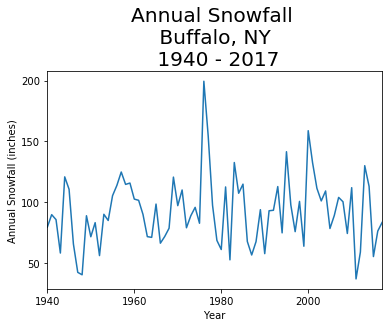

In [38]:
% matplotlib inline

plt.plot(bflo_snowfall_subset["year"], bflo_snowfall_subset["annual"])
plt.style.use('fivethirtyeight')
plt.xlim([1940,2017])
plt.xlabel('Year')
plt.ylabel('Annual Snowfall (inches)')
plt.title('Annual Snowfall \n Buffalo, NY \n 1940 - 2017')
plt.show()

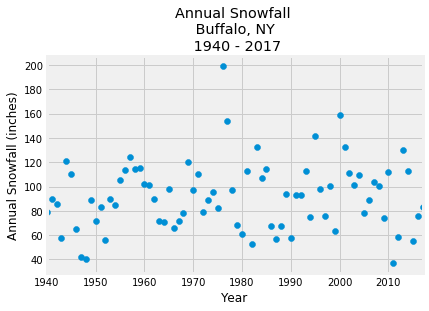

In [39]:
% matplotlib inline

plt.scatter(bflo_snowfall_subset["year"], bflo_snowfall_subset["annual"])
plt.xlabel('Year')
plt.xlim([1940,2017])
plt.ylabel('Annual Snowfall (inches)')
plt.title('Annual Snowfall \n Buffalo, NY \n 1940 - 2017')
plt.show()

There seems to be one noticable outlier. This is no doubt due to the *"blizzard of '77"*. <br>


I also notice periodic high and low points in the line graph, a somewhat cyclic nature of yearly snowfall totals. I am going to resample the annual snowfall by looking at 5 year averages.

In [40]:
bflo_snowfall_subset.corr()

,year,oct,nov,dec,jan,feb,mar,apr,may,annual
year,1.000000,0.112847,-0.279688,0.159125,0.117324,0.033311,0.093363,-0.042736,-0.021009,0.086665
oct,0.112847,1.000000,-0.092223,-0.110820,-0.070536,0.160203,-0.114153,-0.007874,-0.009859,-0.010510
nov,-0.279688,-0.092223,1.000000,0.147129,-0.075712,-0.025107,0.250286,-0.042622,-0.132674,0.419565
dec,0.159125,-0.110820,0.147129,1.000000,0.132030,-0.080941,0.097356,0.009299,-0.066020,0.661723
jan,0.117324,-0.070536,-0.075712,0.132030,1.000000,0.002793,-0.034240,0.119002,-0.090120,0.562441
feb,0.033311,0.160203,-0.025107,-0.080941,0.002793,1.000000,-0.183130,0.031122,0.142025,0.280861
mar,0.093363,-0.114153,0.250286,0.097356,-0.034240,-0.183130,1.000000,-0.157418,-0.058360,0.295956
apr,-0.042736,-0.007874,-0.042622,0.009299,0.119002,0.031122,-0.157418,1.000000,-0.048870,0.132040
may,-0.021009,-0.009859,-0.132674,-0.066020,-0.090120,0.142025,-0.058360,-0.048870,1.000000,-0.065198
annual,0.086665,-0.010510,0.419565,0.661723,0.562441,0.280861,0.295956,0.132040,-0.065198,1.000000


As evident from the scatterplot, the correlation between year and annual snowfall is approximately 0.087 indicating a very weak positive linear relationship between year and annual snowfall totals.

### Resampled Snowfall Data

Before I resample the data, I am going to convert the index of the DataFrame to a DateTime index utilizing the values from the *'year'* column.

In [45]:
bflo_snowfall_subset.index = pd.to_datetime(bflo_snowfall_subset['year'],format = '%Y')

In [46]:
print(bflo_snowfall_subset.index)

DatetimeIndex(['1940-01-01', '1941-01-01', '1942-01-01', '1943-01-01',
               '1944-01-01', '1945-01-01', '1946-01-01', '1947-01-01',
               '1948-01-01', '1949-01-01', '1950-01-01', '1951-01-01',
               '1952-01-01', '1953-01-01', '1954-01-01', '1955-01-01',
               '1956-01-01', '1957-01-01', '1958-01-01', '1959-01-01',
               '1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
      

In [47]:
bflo_snowfall_resample = bflo_snowfall_subset.resample('5A').mean()

In [48]:
print(bflo_snowfall_resample.tail())

              year   oct    nov    dec    jan    feb        mar       apr  \
year                                                                        
2000-12-31  1998.0  0.04  14.94  22.34  32.02   8.80  19.600000  1.460000   
2005-12-31  2003.0  0.08   6.24  36.64  28.08  18.24  13.440000  3.660000   
2010-12-31  2008.0  4.54   2.66  29.02  25.80  23.02   9.660000  1.060000   
2015-12-31  2013.0  0.00   6.58  12.84  24.00  24.02   9.260000  1.980000   
2020-12-31  2016.5  0.05   0.50  31.90  21.10  11.55  19.531169  2.605263   

                 may  annual  
year                          
2000-12-31  0.000000   99.20  
2005-12-31  0.000000  106.38  
2010-12-31  0.000000   95.76  
2015-12-31  0.000000   78.68  
2020-12-31  0.083766   79.65  


Now to create new plots and take a look at the correlation between year and annual snowfall with the resampled data.

In [49]:
med = bflo_snowfall_resample['annual'].median()
print(med)

91.1


Below is a plot with the resampled 5 year annual snowfall data along with a dashed line indicating the median. 

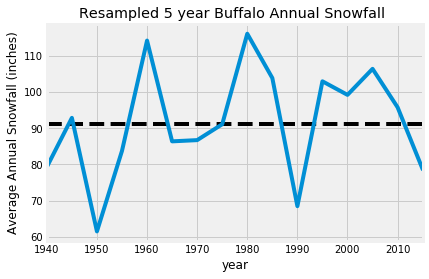

In [50]:
% matplotlib inline


ax = bflo_snowfall_resample['annual'].plot(xlim =('1940-12-31','2015-12-31'))
plt.ylabel('Average Annual Snowfall (inches)')
plt.title('Resampled 5 year Buffalo Annual Snowfall ')

plt.hlines(med,'1940-12-31','2015-12-31', colors = 'k', linestyle = 'dashed', axes = ax)
plt.show()


Additionally, I would like to look at how the median varies over 20 year time spans. To do so I will create another column in the dataframe *year_group* and then make side-by-side boxplots for each grouping of 20 years. 

In [51]:
bflo_snowfall_subset.head()

,year,oct,nov,dec,jan,feb,mar,apr,may,annual
year,,,,,,,,,,
1940-01-01,1940,0.0,17.5,12.1,17.3,23.1,9.3,0.0,0.0,79.3
1941-01-01,1941,0.0,5.0,7.8,31.0,28.0,13.7,4.1,0.0,89.6
1942-01-01,1942,0.0,8.7,26.7,16.9,17.7,10.4,5.1,0.0,85.5
1943-01-01,1943,1.5,13.6,1.7,3.4,24.6,10.5,2.7,0.0,58.0
1944-01-01,1944,0.0,3.9,35.1,50.6,23.3,5.8,0.0,2.0,120.7


In [52]:
type(bflo_snowfall_subset['year'][0])

numpy.int64

In [53]:
def group_twenty(y):
    if y <= 1959:
        v = '1940 - 1959'
    
    elif (y > 1959) & (y <= 1979):
         v = '1960 - 1979'
    
    elif (y > 1970) & (y <= 1999):
         v = '1980 - 1999'
        
    else:
         v = '2000 - present'
    
    return v
    
        

I will test to see if my function works on a typical value from the *year* column:

In [54]:
group_twenty(1962)

'1960 - 1979'

Now I will apply my function to the *year* column of the dataframe and use the values to create the column *year_group*

In [55]:
bflo_snowfall_subset['year_group'] = bflo_snowfall_subset['year'].apply(group_twenty)

In [56]:
bflo_snowfall_subset.head()

,year,oct,nov,dec,jan,feb,mar,apr,may,annual,year_group
year,,,,,,,,,,,
1940-01-01,1940,0.0,17.5,12.1,17.3,23.1,9.3,0.0,0.0,79.3,1940 - 1959
1941-01-01,1941,0.0,5.0,7.8,31.0,28.0,13.7,4.1,0.0,89.6,1940 - 1959
1942-01-01,1942,0.0,8.7,26.7,16.9,17.7,10.4,5.1,0.0,85.5,1940 - 1959
1943-01-01,1943,1.5,13.6,1.7,3.4,24.6,10.5,2.7,0.0,58.0,1940 - 1959
1944-01-01,1944,0.0,3.9,35.1,50.6,23.3,5.8,0.0,2.0,120.7,1940 - 1959


Now I can construct my side-by-side boxplots.

#### Visuals including the "blizzard of '77" 

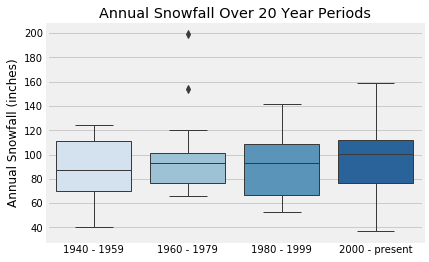

In [57]:
sns.boxplot(x='year_group',y='annual',data = bflo_snowfall_subset, linewidth = 1, palette = 'Blues')
plt.title('Annual Snowfall Over 20 Year Periods')
plt.xlabel('')
plt.ylabel('Annual Snowfall (inches)')

Additionally, I will also create a strip plot for each grouping of twenty years overlayed with a violin plot. 

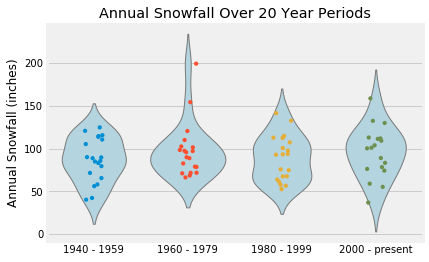

In [58]:
sns.violinplot(x='year_group',y='annual',data = bflo_snowfall_subset, linewidth = 1, color = 'lightblue',inner=None)
sns.stripplot(x='year_group',y='annual',data = bflo_snowfall_subset,size=4.25, jitter=True)
plt.title('Annual Snowfall Over 20 Year Periods')
plt.xlabel('')
plt.ylabel('Annual Snowfall (inches)')

Summary Statiatics for the 20 year groups:

In [62]:
bflo_snowfall_subset.groupby('year_group')['annual'].describe()

,count,mean,std,min,25%,50%,75%,max
year_group,,,,,,,,
1940 - 1959,20.0,86.930000,25.712645,40.1,69.900,87.10,111.300,124.7
1960 - 1979,20.0,97.140000,31.869097,66.1,76.700,92.70,101.650,199.4
1980 - 1999,20.0,88.730000,26.300873,52.4,66.450,93.00,108.500,141.4
2000 - present,18.0,95.672222,30.124073,36.7,76.625,100.55,111.675,158.7


In [63]:
IQR =  bflo_snowfall_subset.groupby('year_group')['annual'].quantile(0.75) - bflo_snowfall_subset.groupby('year_group')['annual'].quantile(0.25)

print(IQR)

year_group
1940 - 1959       41.40
1960 - 1979       24.95
1980 - 1999       42.05
2000 - present    35.05
Name: annual, dtype: float64


In [64]:
range =  bflo_snowfall_subset.groupby('year_group')['annual'].max() - bflo_snowfall_subset.groupby('year_group')['annual'].min()

print(range)

year_group
1940 - 1959        84.6
1960 - 1979       133.3
1980 - 1999        89.0
2000 - present    122.0
Name: annual, dtype: float64


Both plots and the IQR and range calculations yield some interesting observations. Despite the fact that the IQR and the range is higher for the period from 1960-1979 (when the blizzard of '77 occured yielding record snowfall), the most recent data seems to have more variability than the data from the early to mid 20th century.  Additionally, the median steadily increases within each grouping of twenty years.   

#### Visuals not including the "blizzard of '77" 

In [65]:
blizzard_total = bflo_snowfall_subset['annual'].max()
print(blizzard_total)

199.4


In [66]:
bflo_snowfall_subset.loc[bflo_snowfall_subset['annual'] >= blizzard_total ]

,year,oct,nov,dec,jan,feb,mar,apr,may,annual,year_group
year,,,,,,,,,,,
1976-01-01,1976,0.2,31.3,60.7,68.3,22.7,13.5,2.2,0.5,199.4,1960 - 1979


In [71]:
bflo_snowfall_subset.loc['1976-01-01']

year                 1976
oct                   0.2
nov                  31.3
dec                  60.7
jan                  68.3
feb                  22.7
mar                  13.5
apr                   2.2
may                   0.5
annual              199.4
year_group    1960 - 1979
Name: 1976-01-01 00:00:00, dtype: object

I will also look at correlation with the resampled data:

In [73]:
bflo_snowfall_resample.corr()

,year,oct,nov,dec,jan,feb,mar,apr,may,annual
year,1.000000,0.271224,-0.676404,0.443350,0.283672,-0.091882,0.318175,0.051167,-0.020005,0.154358
oct,0.271224,1.000000,-0.364066,0.198260,0.041801,0.237506,-0.123341,-0.143222,-0.127310,0.113272
nov,-0.676404,-0.364066,1.000000,-0.327545,0.043689,-0.047091,0.079883,0.027317,-0.245675,0.223529
dec,0.443350,0.198260,-0.327545,1.000000,0.622356,-0.167058,0.258656,0.257025,-0.278083,0.702225
jan,0.283672,0.041801,0.043689,0.622356,1.000000,-0.001897,0.142484,0.147029,-0.408786,0.837465
feb,-0.091882,0.237506,-0.047091,-0.167058,-0.001897,1.000000,-0.570614,0.249387,0.223212,0.167166
mar,0.318175,-0.123341,0.079883,0.258656,0.142484,-0.570614,1.000000,0.167923,-0.390542,0.239257
apr,0.051167,-0.143222,0.027317,0.257025,0.147029,0.249387,0.167923,1.000000,0.000124,0.437130
may,-0.020005,-0.127310,-0.245675,-0.278083,-0.408786,0.223212,-0.390542,0.000124,1.000000,-0.415511
annual,0.154358,0.113272,0.223529,0.702225,0.837465,0.167166,0.239257,0.437130,-0.415511,1.000000


Again as evident from the visuals made with the resampled data, the correlation between annual snowfall and year is a bit stronger, but still very weak at a value of approximately 0.15436. A linear model is not appropriate for this relationship.

## Temperature Data 

Next I will import the temperature data

In [74]:
bflo_temps = pd.read_csv('Buffalo_Temps_Data.csv')
print(bflo_temps.iloc[0:10])

   SEASON   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV  \
0    1940  18.1  25.0  27.0  40.2  53.0  63.0  69.6  69.6  61.0  49.0  39.2   
1    1941  24.5  23.6  26.2  48.2  54.6  66.0  72.1  67.8  65.1  52.8  43.8   
2    1942  24.2  20.9  36.1  46.8  56.4  65.7  68.0  67.8  62.0  53.2  40.3   
3    1943  21.2  25.8  30.3  36.9  51.8  65.7  71.6  68.8  60.8  48.4  37.5   
4    1944  29.7  25.1  30.0  41.1  63.4  67.1  72.4  71.8  63.6  50.2  42.0   
5    1945  16.2  26.2  44.4  49.8  50.7  64.0  70.2  69.8  64.2  49.8  40.9   
6    1946  27.4  24.7  44.5  44.4  55.0  63.9  71.2  66.0  64.4  56.6  44.4   
7    1947  29.9  21.6  29.9  43.8  52.8  65.8  68.6  75.2  64.0  59.8  38.0   
8    1948  18.6  25.2  35.0  48.8  53.2  65.2  72.0  70.2  64.9  49.6  47.1   
9    1949  31.2  31.8  33.6  45.5  57.6  72.2  74.3  71.6  58.8  57.2  38.0   

    DEC  ANNUAL  
0  32.8    45.6  
1  33.8    48.2  
2  25.2    47.2  
3  26.6    45.4  
4  25.4    48.5  
5  23.8    47.5  
6  3

In [75]:
bflo_temps.columns = bflo_temps.columns.str.lower()

In [76]:
bflo_temps.head()

,season,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual
0,1940,18.1,25.0,27.0,40.2,53.0,63.0,69.6,69.6,61.0,49.0,39.2,32.8,45.6
1,1941,24.5,23.6,26.2,48.2,54.6,66.0,72.1,67.8,65.1,52.8,43.8,33.8,48.2
2,1942,24.2,20.9,36.1,46.8,56.4,65.7,68.0,67.8,62.0,53.2,40.3,25.2,47.2
3,1943,21.2,25.8,30.3,36.9,51.8,65.7,71.6,68.8,60.8,48.4,37.5,26.6,45.4
4,1944,29.7,25.1,30.0,41.1,63.4,67.1,72.4,71.8,63.6,50.2,42.0,25.4,48.5


I would like to find the mean summer and mean winter temperatures for each year. I will create new dataframes for winter and summer titled *winter_temps* and *summer_temps*

### Creating and Cleaning *winter_temps* DataFrame

In [77]:
winter_months =['dec','jan','feb','mar']

winter_temps = bflo_temps.loc[:, winter_months]

print(type(winter_temps))
print(winter_temps.head())


<class 'pandas.core.frame.DataFrame'>
    dec   jan   feb   mar
0  32.8  18.1  25.0  27.0
1  33.8  24.5  23.6  26.2
2  25.2  24.2  20.9  36.1
3  26.6  21.2  25.8  30.3
4  25.4  29.7  25.1  30.0


In [78]:
winter_temps['year'] = bflo_temps['season']
print(winter_temps.head())

    dec   jan   feb   mar  year
0  32.8  18.1  25.0  27.0  1940
1  33.8  24.5  23.6  26.2  1941
2  25.2  24.2  20.9  36.1  1942
3  26.6  21.2  25.8  30.3  1943
4  25.4  29.7  25.1  30.0  1944


Before creating the 'avg' column of my dataframe for the yearly average winter temperature, I want to check for any missing or unexpected values.

In [79]:
winter_temps.shape

(78, 5)

In [80]:
winter_temps.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
dec     78 non-null float64
jan     78 non-null float64
feb     78 non-null float64
mar     78 non-null float64
year    78 non-null int64
dtypes: float64(4), int64(1)
memory usage: 3.1 KB


In [81]:
winter_temps.index

RangeIndex(start=0, stop=78, step=1)

It looks like there is no missing data or unexpected values! I do plan to convert the index to DateTime using the 'year' column values. 

In [82]:
winter_temps.index = pd.to_datetime(winter_temps['year'],format = '%Y')
print(winter_temps.index)

DatetimeIndex(['1940-01-01', '1941-01-01', '1942-01-01', '1943-01-01',
               '1944-01-01', '1945-01-01', '1946-01-01', '1947-01-01',
               '1948-01-01', '1949-01-01', '1950-01-01', '1951-01-01',
               '1952-01-01', '1953-01-01', '1954-01-01', '1955-01-01',
               '1956-01-01', '1957-01-01', '1958-01-01', '1959-01-01',
               '1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
      

Now I can delete the 'year' column and continue exploring the values in this dataframe.

In [83]:
winter_temps.drop('year',axis=1,inplace=True)

In [84]:
print(winter_temps.head())

             dec   jan   feb   mar
year                              
1940-01-01  32.8  18.1  25.0  27.0
1941-01-01  33.8  24.5  23.6  26.2
1942-01-01  25.2  24.2  20.9  36.1
1943-01-01  26.6  21.2  25.8  30.3
1944-01-01  25.4  29.7  25.1  30.0


Create a column *avg* in the *winter_temps* dataframe for the average winter temperature.

In [85]:
winter_temps["avg"] = winter_temps.mean(axis='columns') 
print(winter_temps.head())

             dec   jan   feb   mar     avg
year                                      
1940-01-01  32.8  18.1  25.0  27.0  25.725
1941-01-01  33.8  24.5  23.6  26.2  27.025
1942-01-01  25.2  24.2  20.9  36.1  26.600
1943-01-01  26.6  21.2  25.8  30.3  25.975
1944-01-01  25.4  29.7  25.1  30.0  27.550


### Creating and Cleaning the *summer_temps* DataFrame 

To do so I will repeat all steps taken to create and clean the *winter_temps* DataFrame to create and clean the *summer_temps* DataFrame.

In [86]:
summer_months =['jun','jul','aug','sep']

summer_temps = bflo_temps.loc[:, summer_months]

summer_temps.columns = summer_temps.columns.str.lower()

print(type(summer_temps))
print(summer_temps.head())



<class 'pandas.core.frame.DataFrame'>
    jun   jul   aug   sep
0  63.0  69.6  69.6  61.0
1  66.0  72.1  67.8  65.1
2  65.7  68.0  67.8  62.0
3  65.7  71.6  68.8  60.8
4  67.1  72.4  71.8  63.6


In [87]:
summer_temps['year'] = bflo_temps['season']
print(summer_temps.head())

    jun   jul   aug   sep  year
0  63.0  69.6  69.6  61.0  1940
1  66.0  72.1  67.8  65.1  1941
2  65.7  68.0  67.8  62.0  1942
3  65.7  71.6  68.8  60.8  1943
4  67.1  72.4  71.8  63.6  1944


In [88]:
summer_temps.shape

(78, 5)

In [89]:
summer_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 5 columns):
jun     78 non-null float64
jul     78 non-null float64
aug     78 non-null float64
sep     78 non-null float64
year    78 non-null int64
dtypes: float64(4), int64(1)
memory usage: 3.1 KB


In [90]:
summer_temps.index

RangeIndex(start=0, stop=78, step=1)

In [91]:
summer_temps.index = pd.to_datetime(summer_temps['year'], format ='%Y')

In [92]:
summer_temps.index

DatetimeIndex(['1940-01-01', '1941-01-01', '1942-01-01', '1943-01-01',
               '1944-01-01', '1945-01-01', '1946-01-01', '1947-01-01',
               '1948-01-01', '1949-01-01', '1950-01-01', '1951-01-01',
               '1952-01-01', '1953-01-01', '1954-01-01', '1955-01-01',
               '1956-01-01', '1957-01-01', '1958-01-01', '1959-01-01',
               '1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
      

In [93]:
summer_temps.drop('year',axis=1,inplace=True)
print(summer_temps.head(3))

             jun   jul   aug   sep
year                              
1940-01-01  63.0  69.6  69.6  61.0
1941-01-01  66.0  72.1  67.8  65.1
1942-01-01  65.7  68.0  67.8  62.0


In [94]:
summer_temps['avg'] = summer_temps.mean(axis='columns')
print(summer_temps.head())

             jun   jul   aug   sep     avg
year                                      
1940-01-01  63.0  69.6  69.6  61.0  65.800
1941-01-01  66.0  72.1  67.8  65.1  67.750
1942-01-01  65.7  68.0  67.8  62.0  65.875
1943-01-01  65.7  71.6  68.8  60.8  66.725
1944-01-01  67.1  72.4  71.8  63.6  68.725


### Exploratory Data Analysis: Yearly Summer & Winter Temperatures

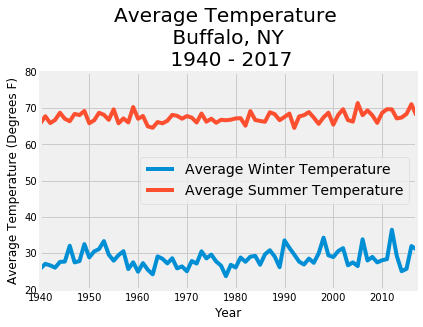

In [95]:
% matplotlib inline


ax = winter_temps['avg'].plot(label='Average Winter Temperature')

summer_temps['avg'].plot(axes=ax,label='Average Summer Temperature')

plt.style.use('fivethirtyeight')

plt.ylim([20,80])

plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Average Temperature (Degrees F)')
plt.title('Average Temperature \n Buffalo, NY \n 1940 - 2017')
plt.show()

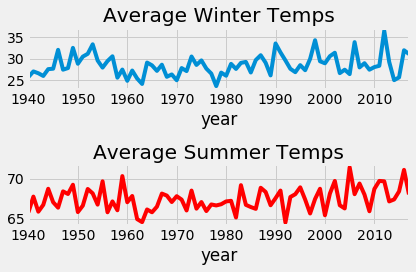

In [109]:
plt.subplot(2,1,1)
winter_temps['avg'].plot()
plt.title('Average Winter Temps')
plt.subplot(2,1,2)
summer_temps['avg'].plot(color = 'red')
plt.title('Average Summer Temps')
plt.tight_layout() 
plt.show()


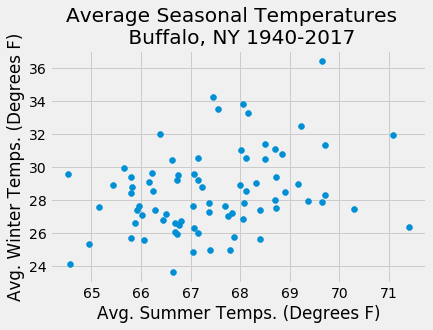

In [103]:
plt.scatter(x = summer_temps['avg'],y = winter_temps['avg'])
plt.title('Average Seasonal Temperatures  \n Buffalo, NY 1940-2017')
plt.xlabel('Avg. Summer Temps. (Degrees F)')
plt.ylabel('Avg. Winter Temps. (Degrees F)')
plt.show()


#### Conclusions

From my initial analysis, it does look like average seasonal temperatures are increasing as time passes. I want to take a look at summer and winter separately and then see if both seasonal average temperatures are increasing at a similar rate. 

### Exploratory Data Analysis: Yearly Summer Temperatures

A plot displaying thr median summer temperature along with a line plot of average summer temperatures from 1940-2015

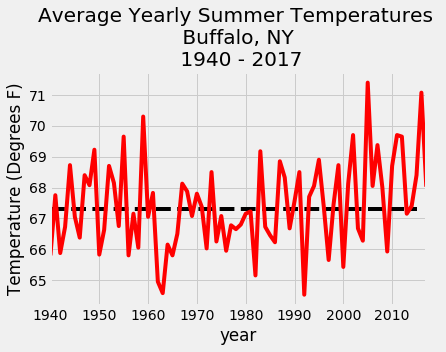

In [139]:
summer_median = summer_temps['avg'].median()

ax = summer_temps['avg'].plot(c='red')

plt.hlines(summer_median,'1940-12-31','2015-12-31', colors = 'k', linestyle = 'dashed', axes = ax)

plt.title('Average Yearly Summer Temperatures \n Buffalo, NY \n 1940 - 2017')
plt.ylabel('Temperature (Degrees F)')
plt.show()


I will also look at average yearly summer temperature over a spans of 20 years and compare the distributions. I will apply the function *group_twenty* to the *summer_temps* dataframe to create a 'year_group' column.

In [142]:
print(summer_temps.head())

             jun   jul   aug   sep     avg  year   year_group
year                                                         
1940-01-01  63.0  69.6  69.6  61.0  65.800  1940  1940 - 1959
1941-01-01  66.0  72.1  67.8  65.1  67.750  1941  1940 - 1959
1942-01-01  65.7  68.0  67.8  62.0  65.875  1942  1940 - 1959
1943-01-01  65.7  71.6  68.8  60.8  66.725  1943  1940 - 1959
1944-01-01  67.1  72.4  71.8  63.6  68.725  1944  1940 - 1959


In [153]:
bflo_temps.index = summer_temps.index

In [141]:
summer_temps['year'] = bflo_temps['season']

In [126]:
print(summer_temps.head(3))

             jun   jul   aug   sep     avg  year
year                                            
1940-01-01  63.0  69.6  69.6  61.0  65.800  1940
1941-01-01  66.0  72.1  67.8  65.1  67.750  1941
1942-01-01  65.7  68.0  67.8  62.0  65.875  1942


In [143]:
summer_temps['year_group'] = summer_temps['year'].apply(group_twenty)

In [134]:
print(summer_temps.head(3))

             jun   jul   aug   sep     avg  year   year_group
year                                                         
1940-01-01  63.0  69.6  69.6  61.0  65.800  1940  1940 - 1959
1941-01-01  66.0  72.1  67.8  65.1  67.750  1941  1940 - 1959
1942-01-01  65.7  68.0  67.8  62.0  65.875  1942  1940 - 1959


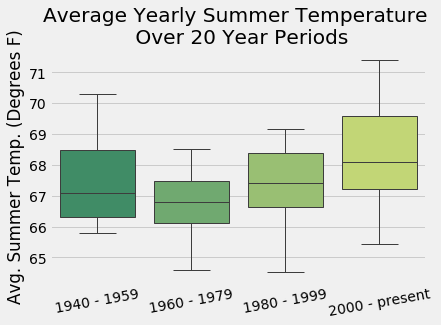

In [135]:
sns.boxplot(x = 'year_group' , y='avg',data=summer_temps, linewidth = 1,palette = 'summer')
plt.title('Average Yearly Summer Temperature \n Over 20 Year Periods')
plt.xticks(rotation=10)
plt.ylabel('Avg. Summer Temp. (Degrees F)')
plt.xlabel('')
plt.show()

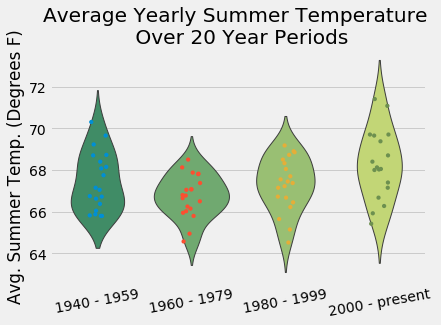

In [144]:
sns.violinplot(x='year_group',y='avg',data = summer_temps, linewidth = 1, palette = 'summer',inner=None)

sns.stripplot(x='year_group',y='avg',data = summer_temps ,size=4.25, jitter=True)

plt.title('Average Yearly Summer Temperature \n Over 20 Year Periods')
plt.xlabel('')
plt.xticks(rotation=10)
plt.ylabel('Avg. Summer Temp. (Degrees F)')
plt.show()

In [146]:
summer_temps.groupby('year_group')['avg'].describe()

,count,mean,std,min,25%,50%,75%,max
year_group,,,,,,,,
1940 - 1959,20.0,67.450000,1.391752,65.800,66.29375,67.1000,68.47500,70.300
1960 - 1979,20.0,66.756250,1.023213,64.575,66.11875,66.7875,67.48125,68.500
1980 - 1999,20.0,67.318750,1.287155,64.525,66.61875,67.4125,68.36875,69.175
2000 - present,18.0,68.280556,1.669989,65.425,67.21250,68.0875,69.58125,71.400


#### Conclusion

Average summer temperatures do seem to be increasing as time passes. Although the median for the most recent 20 year time frame is only about one degree greater than the median of the average summer temperatures from 1940-1959, I still feel this is a significant increase. 

### Exploratory Data Analysis: Yearly Winter Temperatures

A plot displaying thr median summer temperature along with a line plot of average summer temperatures from 1940-2015


In [147]:
med_wtemps = winter_temps['avg'].median()
print(med_wtemps)

27.9875


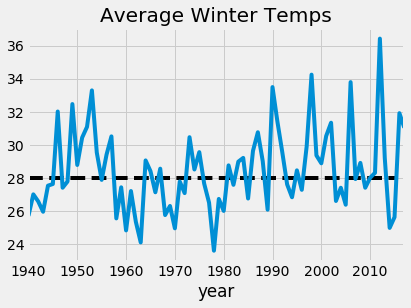

In [148]:
ax = winter_temps['avg'].plot()
plt.title('Average Winter Temps')
plt.hlines(med_wtemps,'1940-01-01','2015-01-01', colors = 'k', linestyle = 'dashed', axes = ax)
plt.show()

I will also look at average yearly summer temperature over a spans of 20 years and compare the distributions. I will apply the function *group_twenty* to the *winter_temps* dataframe to create a 'year_group' column.

In [155]:
winter_temps['year'] = bflo_temps['season']

In [158]:
winter_temps.head(3)

,dec,jan,feb,mar,avg,year,year_group
year,,,,,,,
1940-01-01,32.8,18.1,25.0,27.0,25.725,1940,1940 - 1959
1941-01-01,33.8,24.5,23.6,26.2,27.025,1941,1940 - 1959
1942-01-01,25.2,24.2,20.9,36.1,26.600,1942,1940 - 1959


In [157]:
winter_temps['year_group'] = winter_temps['year'].apply(group_twenty)

In [159]:
winter_temps.head(3)

,dec,jan,feb,mar,avg,year,year_group
year,,,,,,,
1940-01-01,32.8,18.1,25.0,27.0,25.725,1940,1940 - 1959
1941-01-01,33.8,24.5,23.6,26.2,27.025,1941,1940 - 1959
1942-01-01,25.2,24.2,20.9,36.1,26.600,1942,1940 - 1959


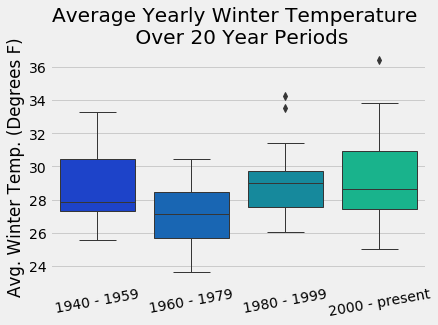

In [161]:
sns.boxplot(x = 'year_group' , y='avg',data=winter_temps, linewidth = 1,palette = 'winter')
plt.title('Average Yearly Winter Temperature \n Over 20 Year Periods')
plt.xticks(rotation=10)
plt.ylabel('Avg. Winter Temp. (Degrees F)')
plt.xlabel('')
plt.show()

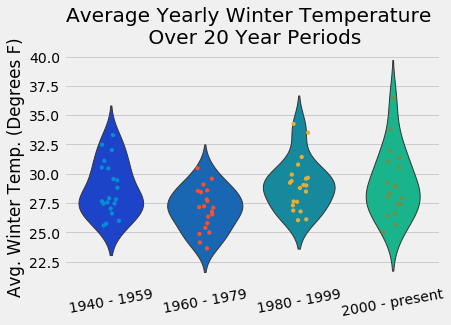

In [163]:
sns.violinplot(x='year_group',y='avg',data = winter_temps, linewidth = 1, palette = 'winter',inner=None)

sns.stripplot(x='year_group',y='avg',data = winter_temps ,size=4.25, jitter=True)

plt.title('Average Yearly Winter Temperature \n Over 20 Year Periods')
plt.xlabel('')
plt.xticks(rotation=10)
plt.ylabel('Avg. Winter Temp. (Degrees F)')
plt.show()

In [164]:
winter_temps.groupby('year_group')['avg'].describe()

,count,mean,std,min,25%,50%,75%,max
year_group,,,,,,,,
1940 - 1959,20.0,28.716250,2.296368,25.575,27.325,27.8500,30.46875,33.300
1960 - 1979,20.0,26.996250,1.839502,23.625,25.675,27.1250,28.45000,30.475
1980 - 1999,20.0,29.062500,2.206055,26.025,27.525,29.0125,29.71875,34.250
2000 - present,18.0,29.165278,2.925762,25.000,27.425,28.6125,30.92500,36.425


#### Conclusions

From a brief look at average winter temperatures over 20 year periods, there seems to be a slight increase in the mean average winter temperature and a slight increase in the median average winter temperature, but the increases are not as large as they are seen with the summer temperatures. 

## Final Conclusions

- Snowfall amounts have not changed, seem to fluctuate. Is there a pattern to this? 
- Average summer and average winter temperatures seem to be slowly increasing throughout the years, but not at the same rate. Are these increases significant? Is there a relationship between average summer and winter temperatures?